# Forecasting of Home Sales - Time Series

Using machine learning on MLS (Multiple Listing Services) data to accurately predict real estate volume of Santa Monica and Greater Los Angeles Area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from epiweeks import Week
from statsmodels.tools.eval_measures import rmse
from src.time_scripts import *

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
pd.plotting.register_matplotlib_converters()

In [4]:
from pylab import rcParams
rcParams['figure.figsize']=12,5

## READ CSV INTO DATAFRAME

In [5]:
master=pd.read_csv('data/clean_master.csv',header=0, index_col=0)

## IMPORT PROPHET

In [6]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot
from src.time_scripts import *

Separate into property type and city subsets

In [7]:
master, sfr_master, condo_master, town_master, sm_data, bh_data, sl_data = forecasting_datasets_setup(master) 

## Split into Weeks
+ split into weekly unit closed count
+ split into different cities

## Data is formatted for modeling

In [8]:
# data by city
sm_count_weekly_data=week_split_count(sm_data)
bh_count_weekly_data=week_split_count(bh_data)
sl_count_weekly_data=week_split_count(sl_data)

In [9]:
# data is compared at different time increments
master_day_data=day_split_count(master)
sfr_day_data=day_split_count(sfr_master)
condo_day_data=day_split_count(condo_master)

master_week_data=week_split_count(master)
sfr_week_data=week_split_count(sfr_master)
condo_week_data=week_split_count(condo_master)

# master_month_data=time_series_sale_count(master)
# sfr_month_data=time_series_sale_count(sfr_master)
# condo_month_data=time_series_sale_count(condo_master)


# Implement Facebook Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


''

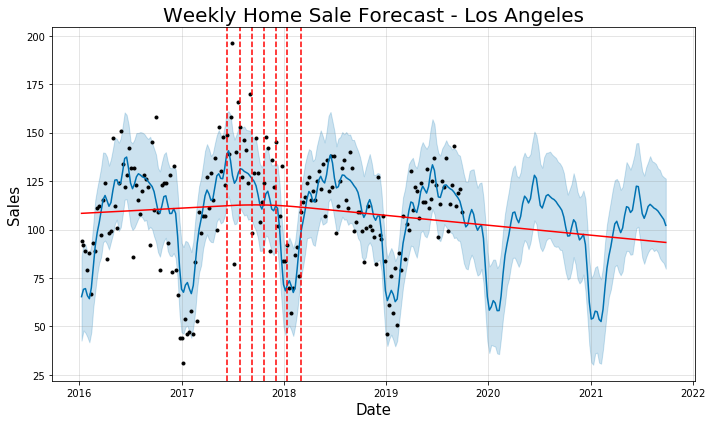

In [10]:
master_model=Prophet()
master_model.fit(master_week_data)
master_future = master_model.make_future_dataframe(periods=104,freq='W')
master_forecast = master_model.predict(master_future)
fig = master_model.plot(master_forecast)
a = add_changepoints_to_plot(fig.gca(),master_model,master_forecast)
plt.title('Weekly Home Sale Forecast - Los Angeles',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Sales',size=15)
plt.savefig('pictures/house_sale_forecast.png')
plt.tight_layout()
;

## Out of the box forecasting model

''

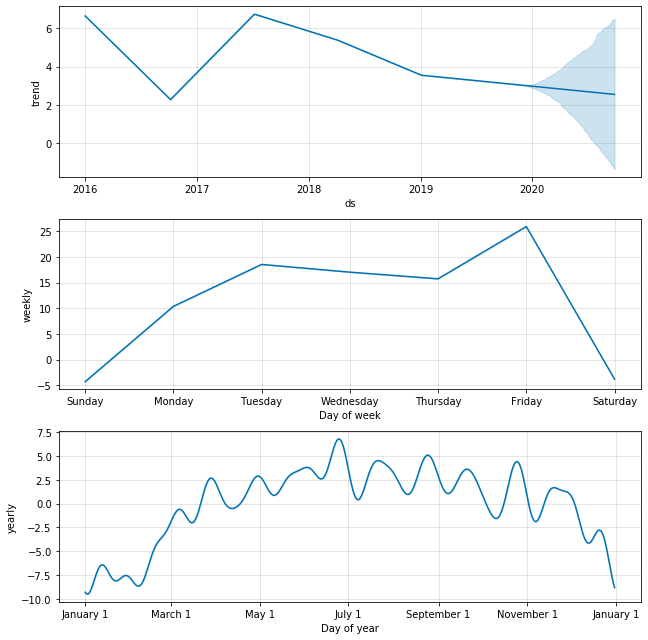

In [11]:
## These are the parameters that are tuned for better performance
master_model=Prophet(
    growth='linear',
    n_changepoints=4,
    changepoint_range=0.8,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    seasonality_prior_scale=20,
    changepoint_prior_scale=.5,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20)
master_model.fit(master_day_data)
master_future = master_model.make_future_dataframe(periods=365)
master_forecast = master_model.predict(master_future)
master_model.plot_components(master_forecast)
plt.savefig('pictures/plot_components_daily.png')
;

Test the model by splitting it and comparing the prediction to data the model has not seen yet.

In [12]:
master_week_data.shape[0] # check size of dataframe

195

## Use naive forecasting as baseline prediction

MAPE = 0.084
RMSE = 11.121
MEAN = 110.07
BASELINE MAPE = 0.085
BASELINE RMSE = 11.858


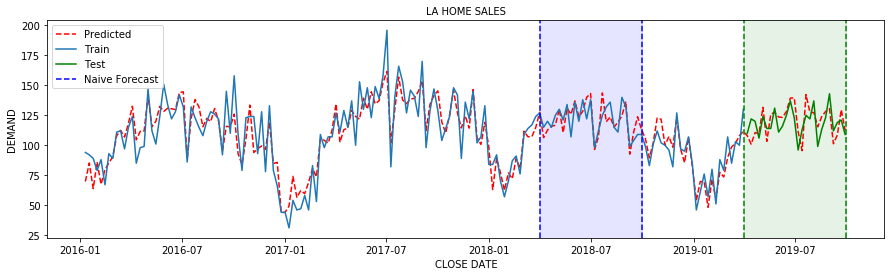

In [13]:
split=169 
freq='W'
train_test_split_weekly_analysis(master_week_data,split,freq)
plt.title('LA HOME SALES', fontsize=10)

# Label plots
plt.xlabel('CLOSE DATE', fontsize=10)
plt.ylabel('DEMAND', fontsize=10)
plt.savefig('pictures/LA_volume.png');

## Analyze residence type: SFR
+ fitting the model and looking at SFR property types specifically 

MAPE = 0.096
RMSE = 9.958
MEAN = 76.76
BASELINE MAPE = 0.181
BASELINE RMSE = 19.632


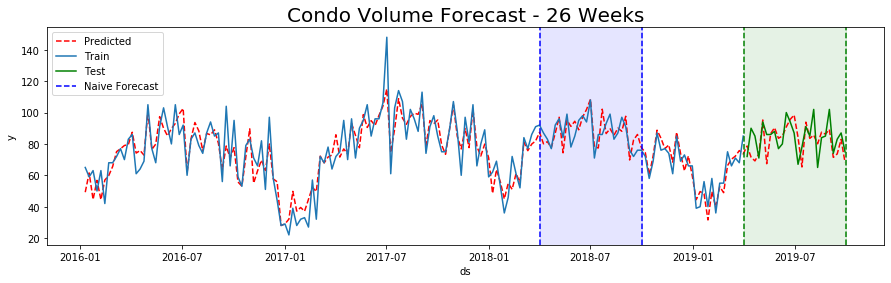

In [14]:
changepoints=48
split=169
freq='W'


prophet_analysis(sfr_week_data,split,freq,changepoints)
plt.title('Condo Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/sfr_volume.png');

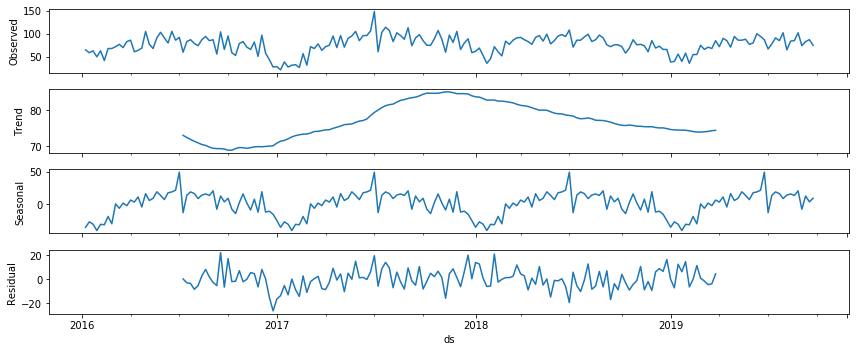

In [15]:
plot_decompose(sfr_week_data)

## Analyze residence type: Condo

MAPE = 0.162
RMSE = 5.81
MEAN = 27.93
BASELINE MAPE = 0.307
BASELINE RMSE = 9.482


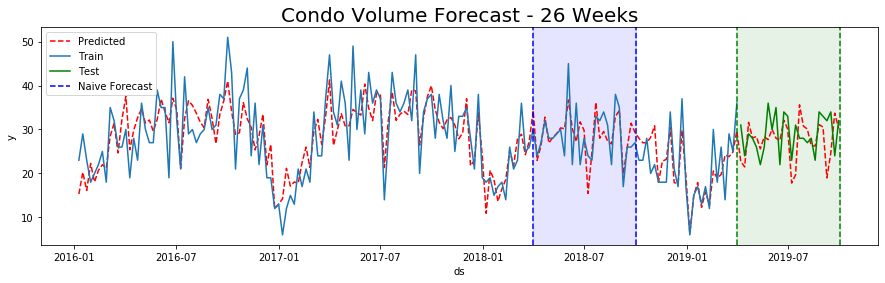

In [16]:
changepoints=48
split=169
freq='W'


prophet_analysis(condo_week_data,split,freq,changepoints)
plt.savefig('pictures/condo_weekly_split.png')
plt.title('Condo Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/condo_volume.png');

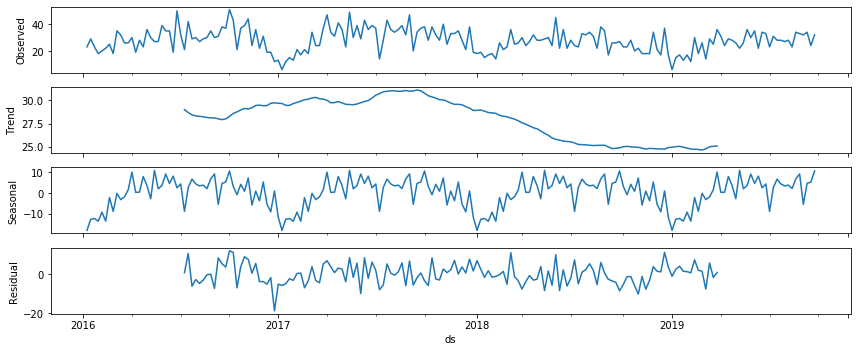

In [17]:
plot_decompose(condo_week_data)

## Weekly average sale price (CITIES)
+ normalize target

In [18]:
sm_week_split_avg_close_price = week_split_avg_close_price(sm_data)
bh_week_split_avg_close_price = week_split_avg_close_price(bh_data)
sl_week_split_avg_close_price = week_split_avg_close_price(sl_data)

## Weekly average sale COUNT (CITIES)

In [19]:
sm_week_split_count = week_split_count_close_price(sm_data)
bh_week_split_count = week_split_count_close_price(bh_data)
sl_week_split_count = week_split_count_close_price(sl_data)

## Examining and forecasting weekly avg sale price by city

## SilverLake AVG Sale Price Trend

MAPE = 0.006
RMSE = 0.114
MEAN = 13.88
BASELINE MAPE = 0.01
BASELINE RMSE = 0.119


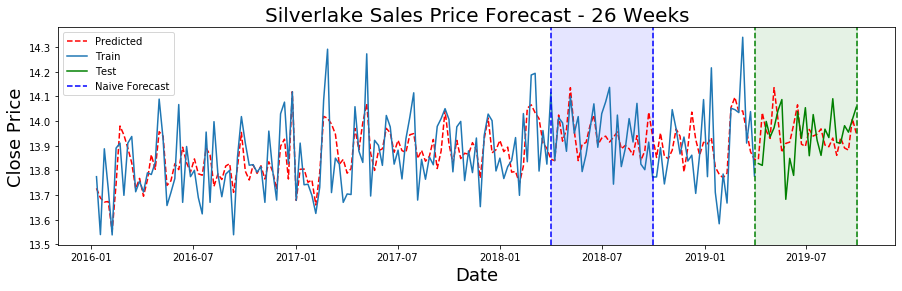

In [20]:
split=169
freq='W'
# plot_compare(sm_count_weekly_data,bh_count_weekly_data,sl_count_weekly_data,freq)
prophet_analysis_type(sl_week_split_avg_close_price,split,freq)


# Label plots
plt.title('Silverlake Sales Price Forecast - 26 Weeks', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.savefig('pictures/sl_price.png');

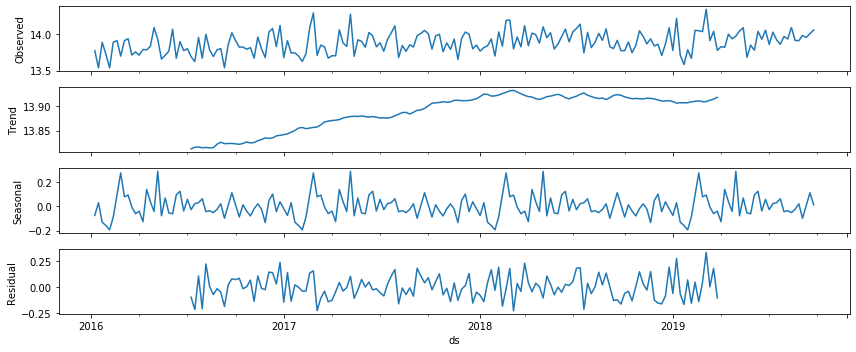

In [21]:
plot_decompose(sl_week_split_avg_close_price)

## Silverlake Sales Count

MAPE = 0.053
RMSE = 0.214
MEAN = 3.09
BASELINE MAPE = 0.077
BASELINE RMSE = 0.293


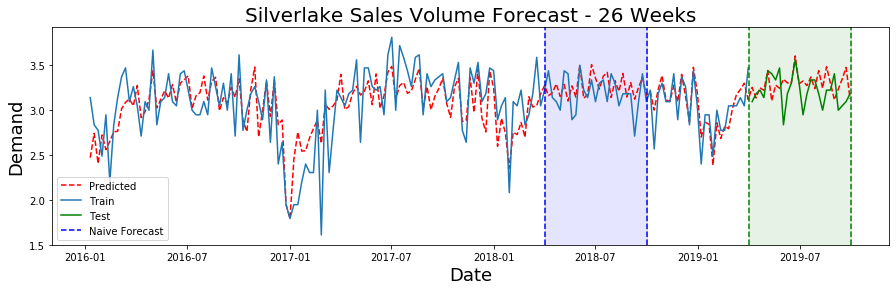

In [22]:
split=169
freq='W'
prophet_analysis_type(sl_week_split_count,split,freq)

# Label plots
plt.title('Silverlake Sales Volume Forecast - 26 Weeks', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Demand', fontsize=18)
plt.savefig('pictures/sl_volume.png');

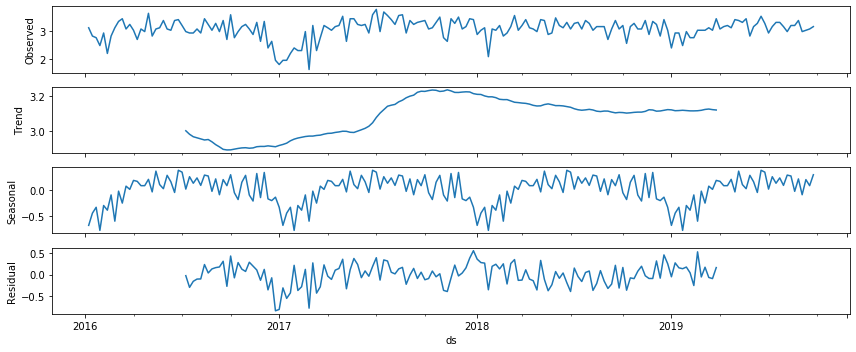

In [23]:
plot_decompose(sl_week_split_count)

## Santa Monica AVG Sale Price Trend

MAPE = 0.019
RMSE = 0.317
MEAN = 14.19
BASELINE MAPE = 0.021
BASELINE RMSE = 0.283


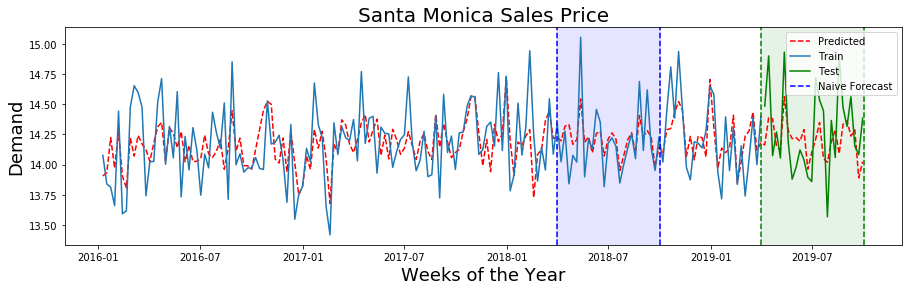

In [24]:
split=169
freq='W'
changepoints = 5
# plot_compare(sm_count_weekly_data,bh_count_weekly_data,sl_count_weekly_data,freq)
prophet_analysis_type(sm_week_split_avg_close_price,split,freq)
plt.title('Santa Monica Sales Price', fontsize=20)
plt.xlabel('Weeks of the Year', fontsize=18)
plt.ylabel('Demand', fontsize=18)
plt.savefig('pictures/sm_price.png');

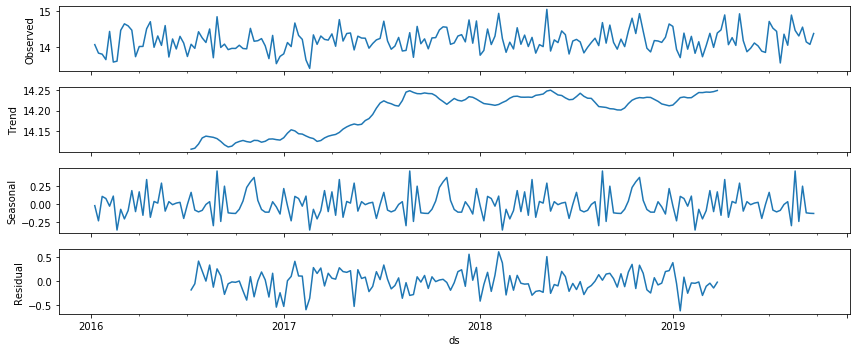

In [25]:
plot_decompose(sm_week_split_avg_close_price)

## Santa Monica Sales Count

MAPE = 0.26
RMSE = 0.472
MEAN = 1.98
BASELINE MAPE = 0.47
BASELINE RMSE = 0.708


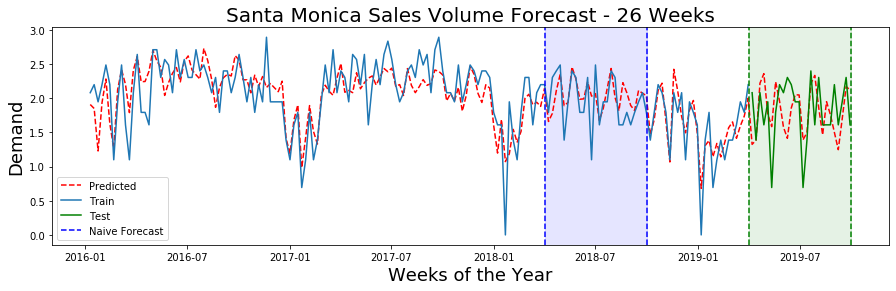

In [26]:
split=169
freq='W'
prophet_analysis_type(sm_week_split_count,split,freq)
# Label plots
plt.xlabel('Weeks of the Year', fontsize=18)
plt.ylabel('Demand', fontsize=18)
plt.title('Santa Monica Sales Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/sm_volume.png');

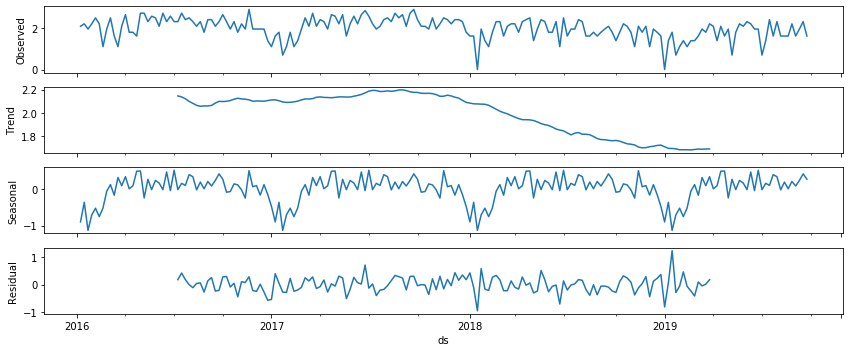

In [27]:
plot_decompose(sm_week_split_count)

## Mid-Wilshire AVG Sale Price Trend

MAPE = 0.009
RMSE = 0.146
MEAN = 14.27
BASELINE MAPE = 0.011
BASELINE RMSE = 0.149


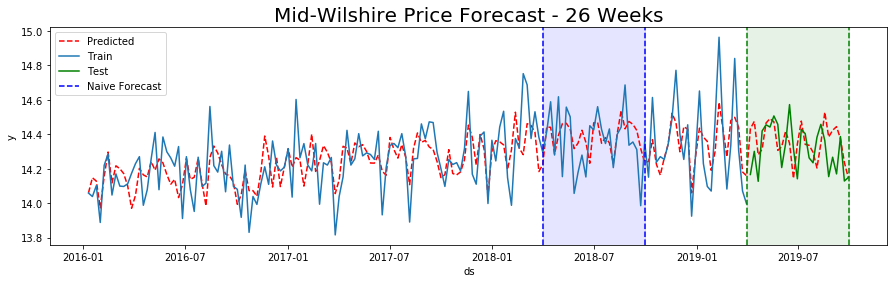

In [28]:
split=169
freq='W'
prophet_analysis_type(bh_week_split_avg_close_price,split,freq)
plt.title('Mid-Wilshire Price Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/wilshire_price.png');

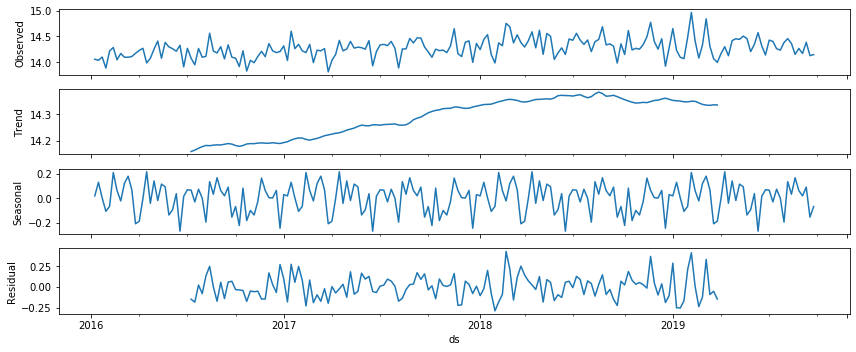

In [29]:
plot_decompose(bh_week_split_avg_close_price)

## Mid-Wilshire Sales Count

MAPE = 0.051
RMSE = 0.221
MEAN = 3.47
BASELINE MAPE = 0.067
BASELINE RMSE = 0.33


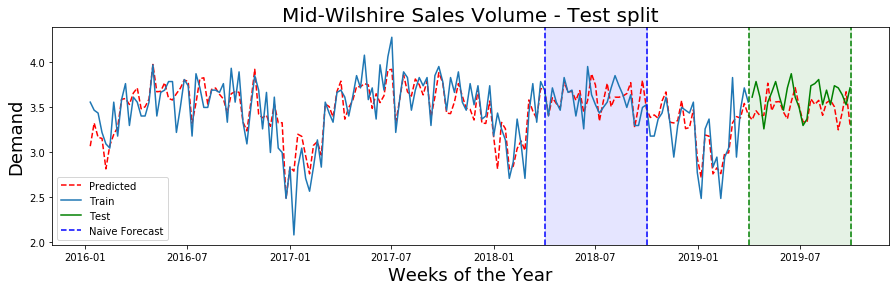

In [30]:
split=169
freq='W'
prophet_analysis_type(bh_week_split_count,split,freq)
# Label plots
plt.xlabel('Weeks of the Year', fontsize=18)
plt.ylabel('Demand', fontsize=18)
plt.title('Mid-Wilshire Sales Volume - Test split', fontsize=20)
plt.savefig('pictures/wilshire_volume.png');

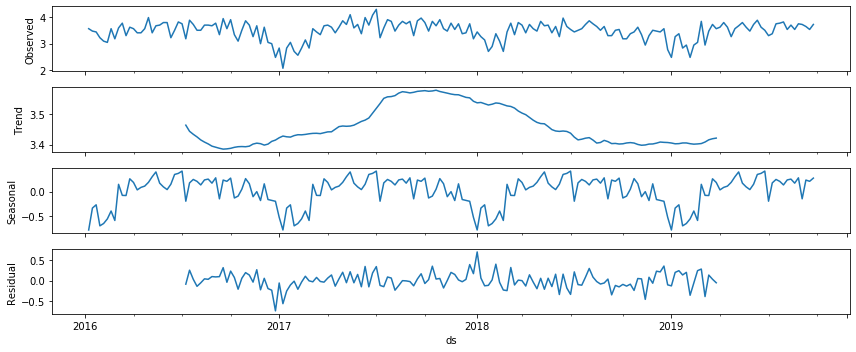

In [31]:
plot_decompose(bh_week_split_count)

## Compare behavior of each city's historical home price pattern

''

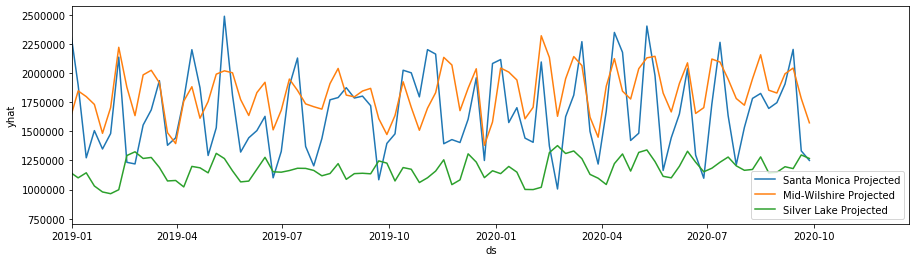

In [32]:
sm_week_split_avg_close_price = week_split_avg_close_price(sm_data)
bh_week_split_avg_close_price = week_split_avg_close_price(bh_data)
sl_week_split_avg_close_price = week_split_avg_close_price(sl_data)

split=169
freq='W'
plot_compare(sm_week_split_avg_close_price,bh_week_split_avg_close_price,sl_week_split_avg_close_price,freq)
plt.xlim(pd.to_datetime('2019-01-01'))
# plt.axvline(pd.to_datetime('2019-10-01'),color='r',linestyle='--')
plt.savefig('pictures/price_forecast.png')
;

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


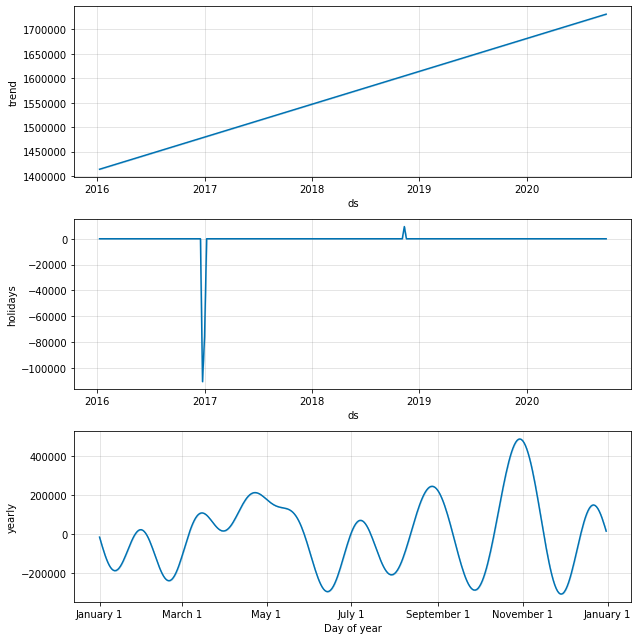

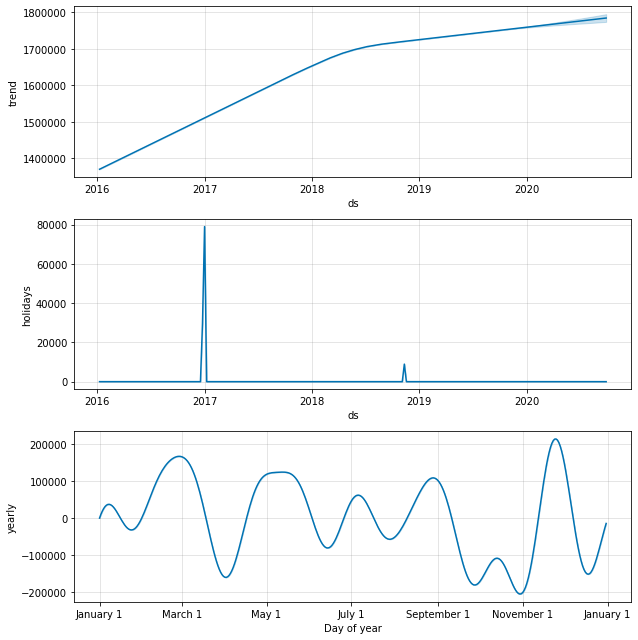

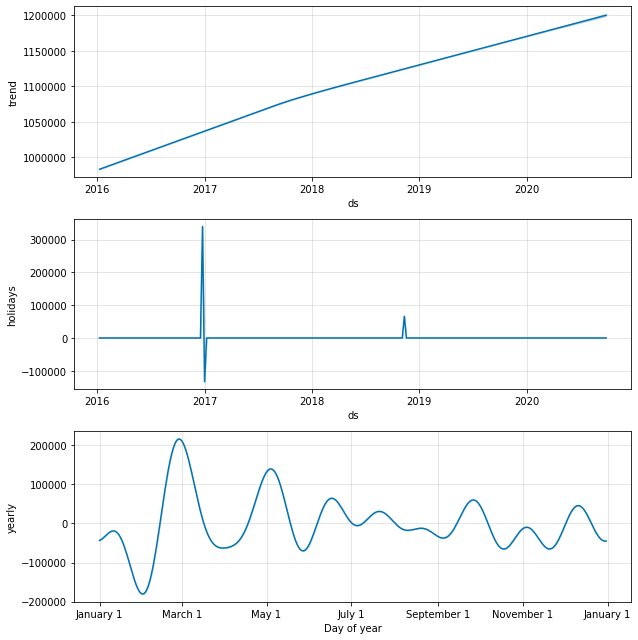

In [33]:
sm_future, bh_future, sl_future = give_forecast(sm_week_split_avg_close_price,bh_week_split_avg_close_price,sl_week_split_avg_close_price,freq)


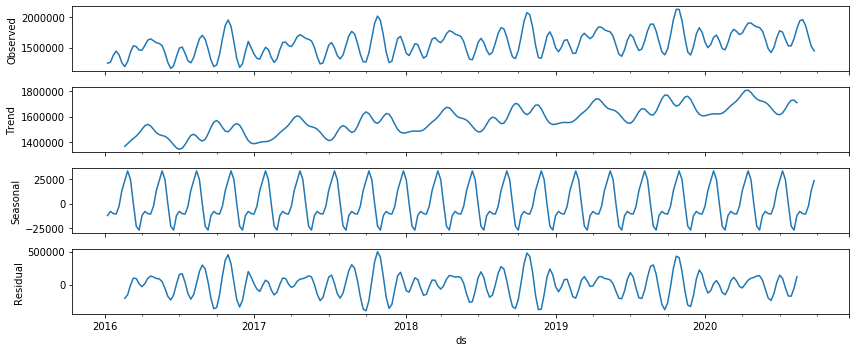

In [34]:
plot_future_decompose(sm_future)

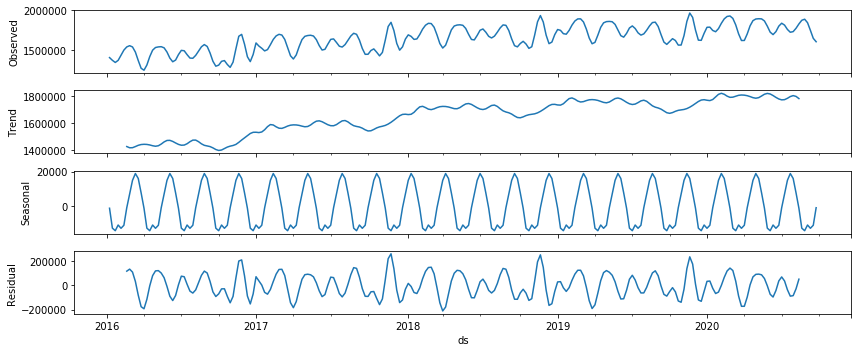

In [35]:
plot_future_decompose(bh_future)

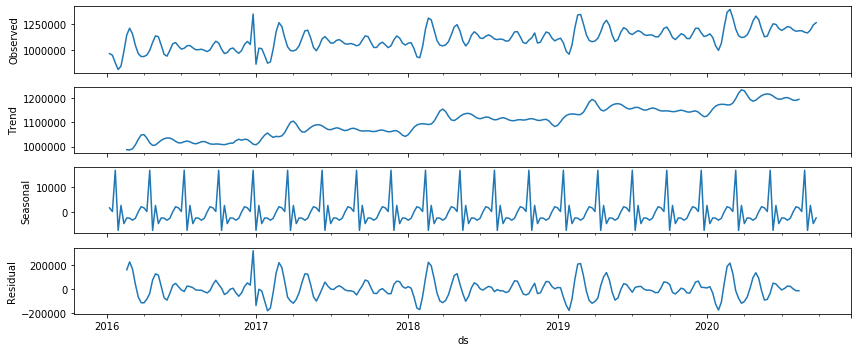

In [36]:
plot_future_decompose(sl_future)

''

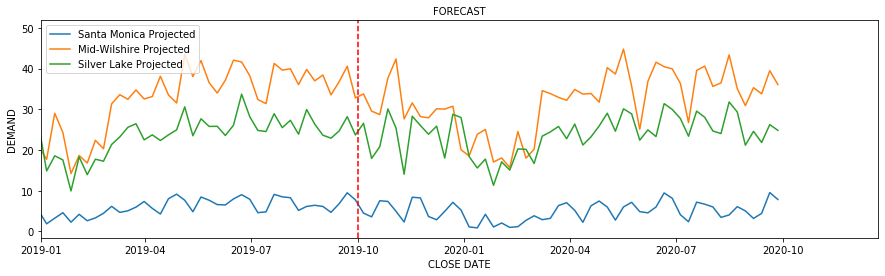

In [37]:
sm_week_split_count = week_split_count_close_price(sm_data)
bh_week_split_count = week_split_count_close_price(bh_data)
sl_week_split_count = week_split_count_close_price(sl_data)

split=169
freq='W'
plot_compare(sm_week_split_count,bh_week_split_count,sl_week_split_count,freq)
plt.xlim(pd.to_datetime('2019-01-01'))
plt.axvline(pd.to_datetime('2019-10-01'),color='r',linestyle='--')

# Label plots
plt.xlabel('CLOSE DATE', fontsize=10)
plt.ylabel('DEMAND', fontsize=10)
plt.title('FORECAST', fontsize=10)
plt.savefig('pictures/count_forecast.png')
;

In [ ]:
sm_future, bh_future, sl_future = give_forecast(sm_week_split_count,bh_week_split_count,sl_week_split_count,freq)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
plot_future_decompose(sm_future)

In [ ]:
plot_future_decompose(bh_future)

In [ ]:
plot_future_decompose(sl_future)

In [ ]:
sm_week_split_count = week_split_count_close_price(sm_data)
bh_week_split_count = week_split_count_close_price(bh_data)
sl_week_split_count = week_split_count_close_price(sl_data)

In [ ]:
master_model=Prophet(
    growth='linear',
    n_changepoints=3,
    changepoint_range=0.8,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    seasonality_prior_scale=20,
    changepoint_prior_scale=.5,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20)
master_model.add_country_holidays(country_name='US')
master_model.fit(bh_week_split_count)
master_future = master_model.make_future_dataframe(periods=104,freq='W')
master_forecast = master_model.predict(master_future)


fig = master_model.plot(master_forecast)
a = add_changepoints_to_plot(fig.gca(),master_model,master_forecast)
plt.axvline(pd.to_datetime('2019-10-01'),color='r',linestyle='--')
plt.xlim(pd.to_datetime('2019-01-01'))
# Label plots
plt.xlabel('CLOSE DATE', fontsize=10)
plt.ylabel('DEMAND', fontsize=10)
plt.title('Mid-Wilshire Forecast w/ Trend', fontsize=10)
plt.savefig('Mid-Wilshire_forecast_w_trend.png');

In [ ]:
fig = plot(master_model, master_forecast, figsize=(15, 6))
a = add_changepoints_to_plot(fig.gca(),master_model,master_forecast)
plt.axvline(pd.to_datetime('2019-10-01'),color='r',linestyle='--')
plt.xlim(pd.to_datetime('2019-01-01'))
# Label plots
plt.xlabel('CLOSE DATE', fontsize=20)
plt.ylabel('DEMAND', fontsize=18)
plt.title('MID-WILSHIRE W/ FORECASTED TREND', fontsize=18)
plt.savefig('pictures/midwilshire_forecasted_trend.png')
;

In [ ]:
bh_future.tail()

In [ ]:
bh_week_split_count.tail()

## CV

For calculating accuracy we use mean absolute percent error (MAPE). 

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(master_week_data,freq,changepoints=3)

In [ ]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

## MAPE is relative to size

In [ ]:
split=169
freq='W'

df_cv, perf = prophet_cv_analysis(sl_week_split_avg_close_price,freq,changepoints=3)

In [ ]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

## Santa Monica Cross Validation Set

In [ ]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(sm_week_split_avg_close_price,freq,changepoints=3)

## Santa Monica MAPE

In [ ]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

## Beverly Hills CV

In [ ]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(bh_week_split_avg_close_price,freq,changepoints=3)

In [ ]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

## Plotting the Cross Validation metrics

In [ ]:
plot_cross_validation_metric(df_cv,metric='mape')